# EDA for USA House Pricing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
df = pd.read_csv('E:\CS 009\\USA Housing Dataset.csv')

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [9]:
df = df.drop(['date','street','city','statezip','country'],axis=1)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0


In [11]:
df.shape

(4140, 13)

In [12]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

price            1625
bedrooms            9
bathrooms          24
sqft_living       549
sqft_lot         2856
floors              6
waterfront          2
view                5
condition           5
sqft_above        491
sqft_basement     205
yr_built          115
yr_renovated       60
dtype: int64

In [15]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [16]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')


In [17]:
df[['price','bedrooms','bathrooms','floors']] = df[['price','bedrooms','bathrooms','floors']].astype('int64')

In [18]:
df.dtypes

price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
dtype: object

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000,3,2,1340,1384,3,0,0,3,1340,0,2008,0
1,800000,4,3,3540,159430,2,0,0,3,3540,0,2007,0
2,2238888,5,6,7270,130017,2,0,0,3,6420,850,2010,0
3,324000,3,2,998,904,2,0,0,3,798,200,2007,0
4,549900,5,2,3060,7015,1,0,0,5,1600,1460,1979,0


In [20]:

sns.set_palette('husl')

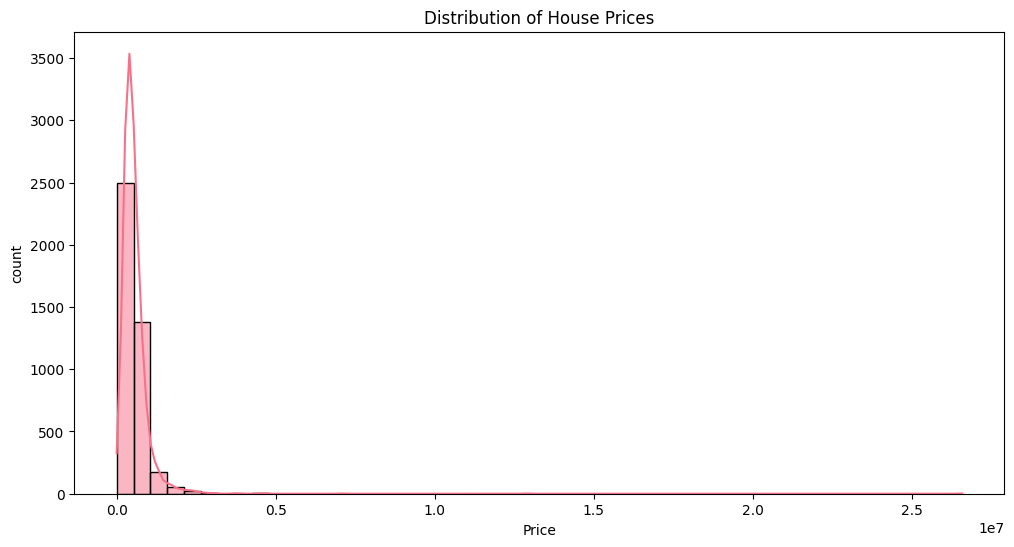

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df, x='price',bins=50,kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

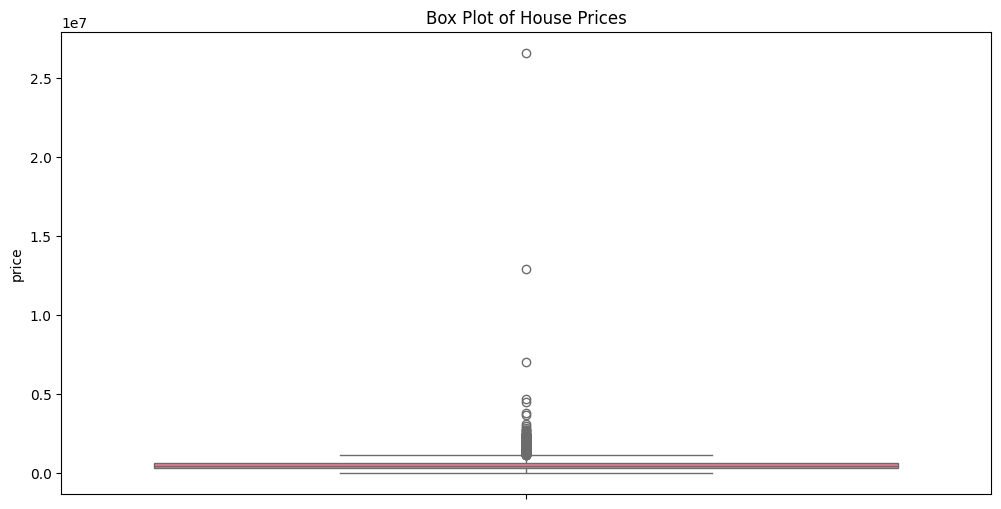

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(df,y='price')
plt.title('Box Plot of House Prices')
plt.show()

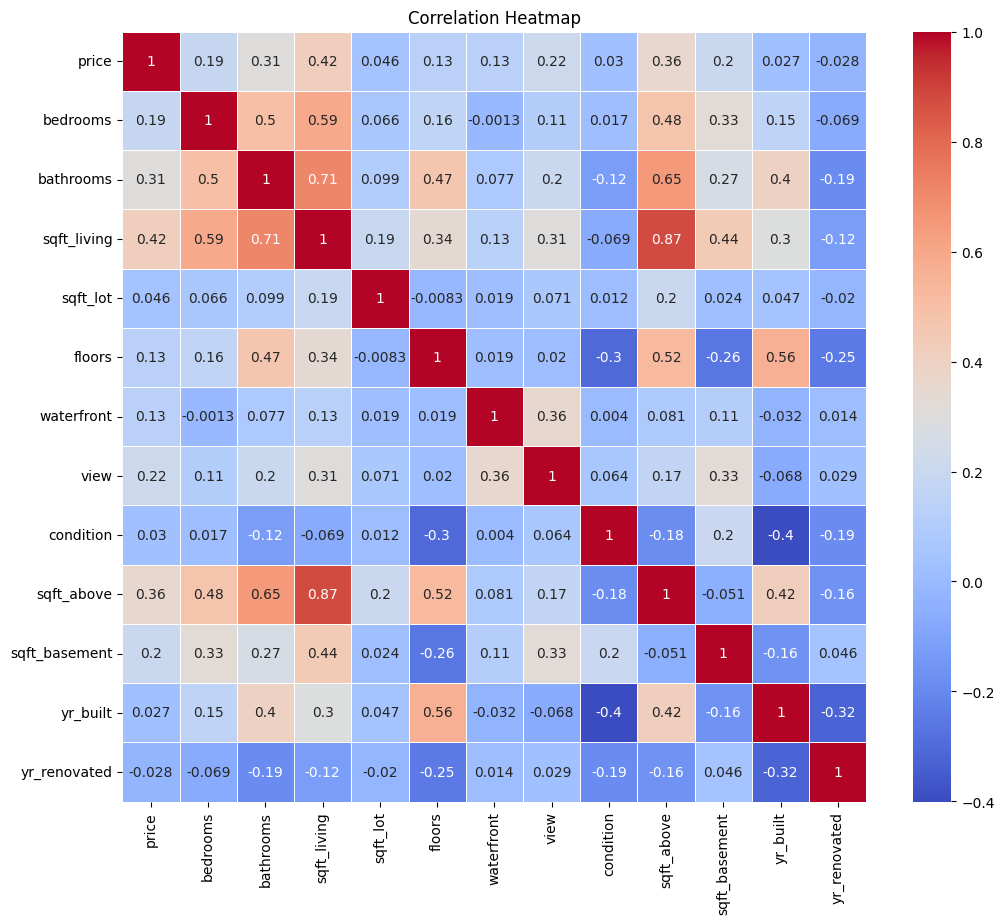

In [20]:
plt.figure(figsize=(12,10))
correlation=df.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

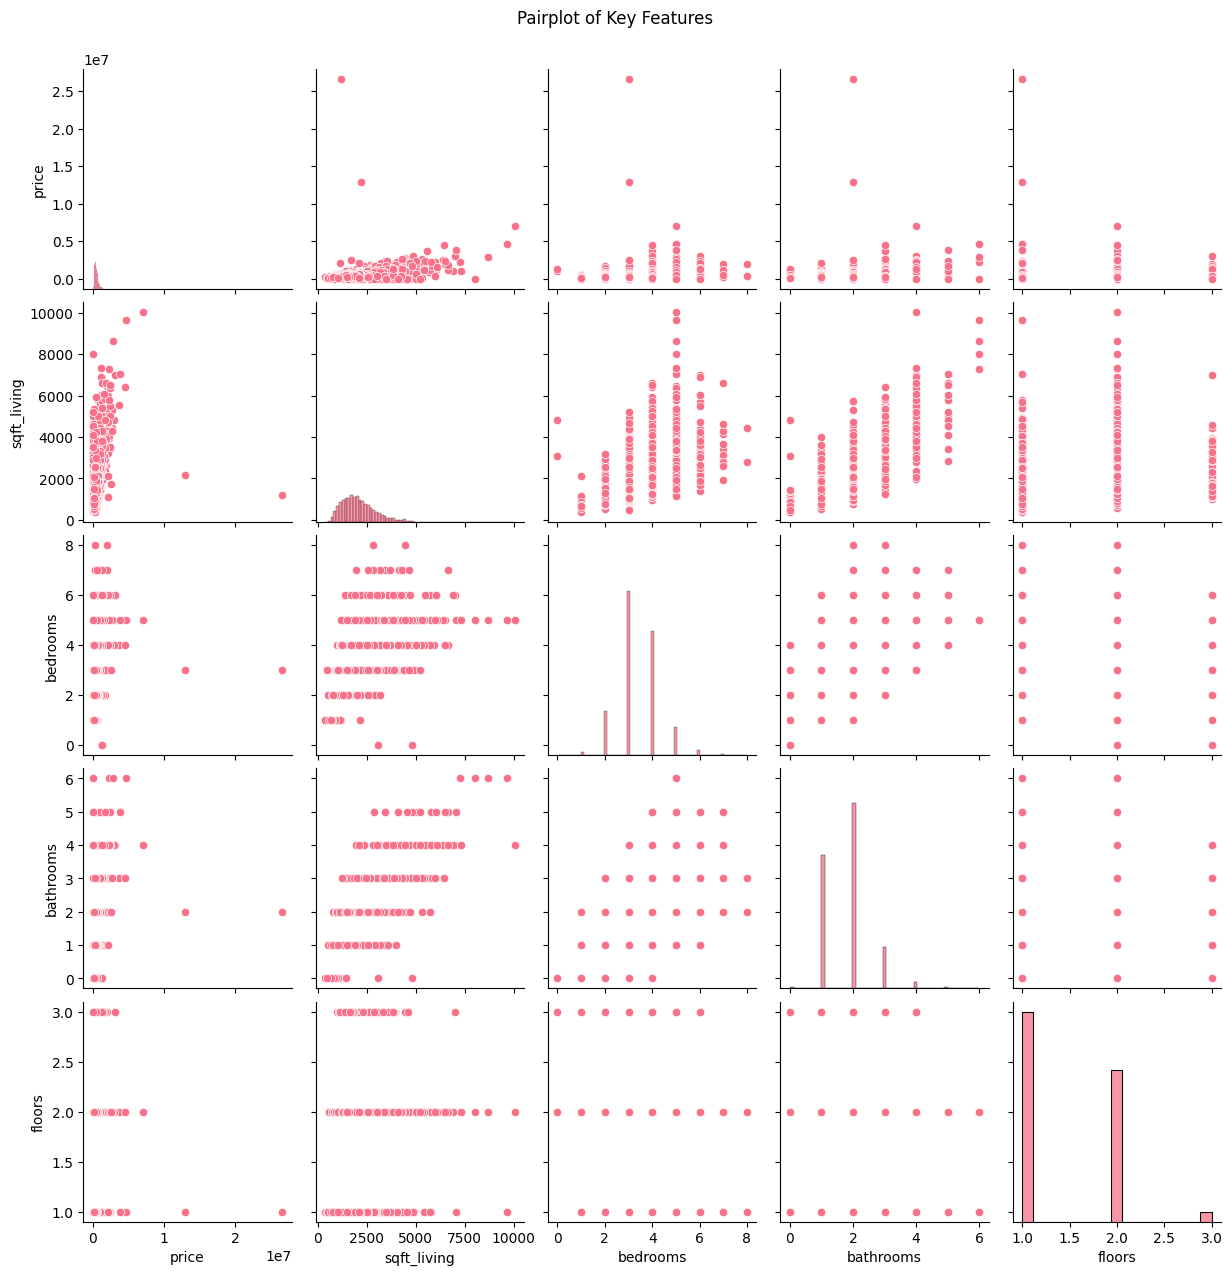

In [21]:
sns.pairplot(df[['price','sqft_living','bedrooms','bathrooms','floors']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

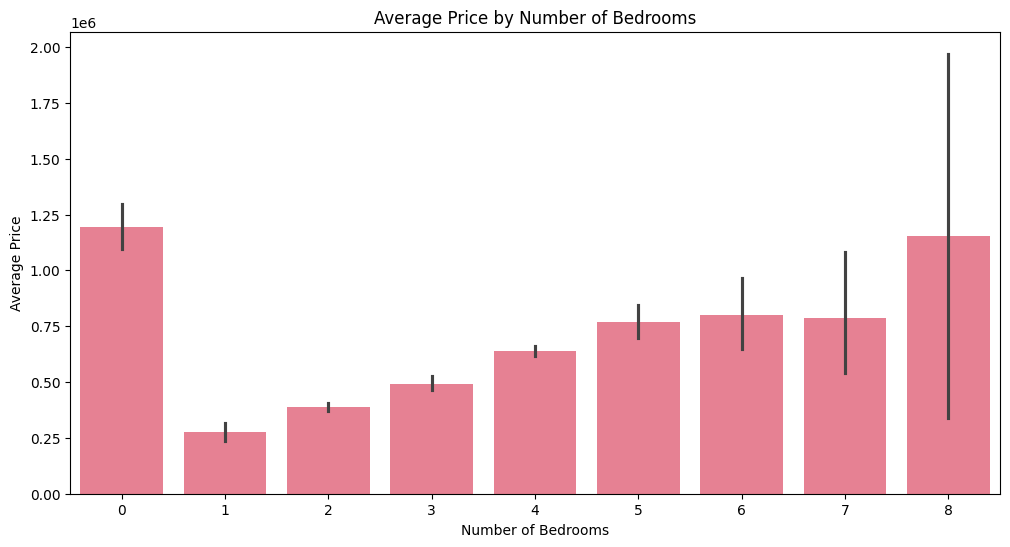

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(df,x='bedrooms',y='price')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

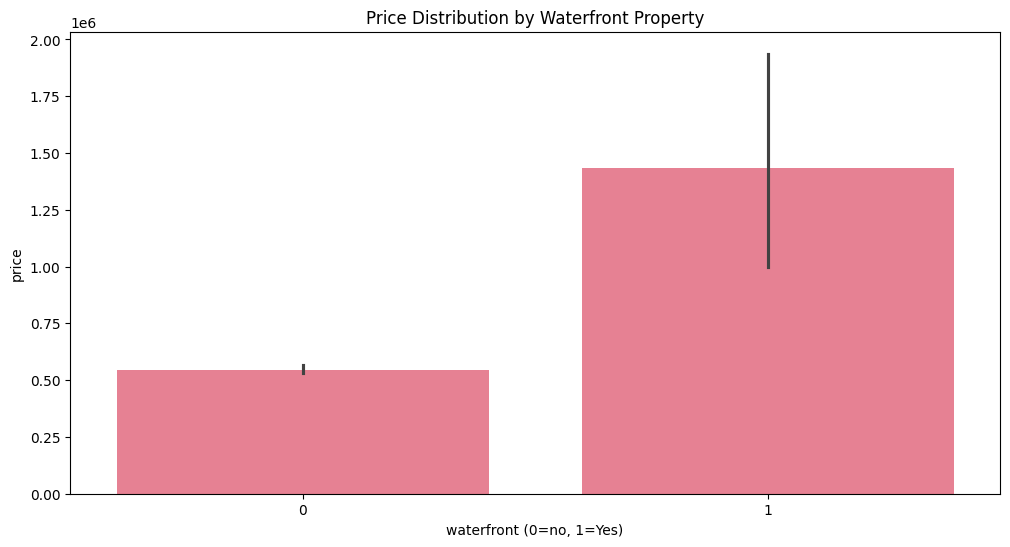

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(df,x='waterfront',y='price')
plt.title('Price Distribution by Waterfront Property')
plt.xlabel('waterfront (0=no, 1=Yes)')
plt.ylabel('price')
plt.show()

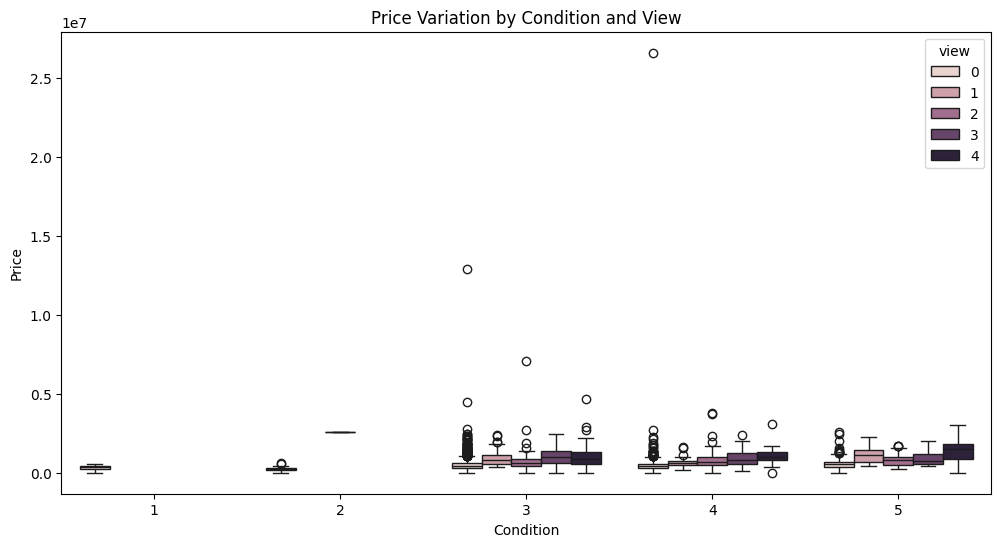

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condition', y='price', hue='view')
plt.title('Price Variation by Condition and View')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

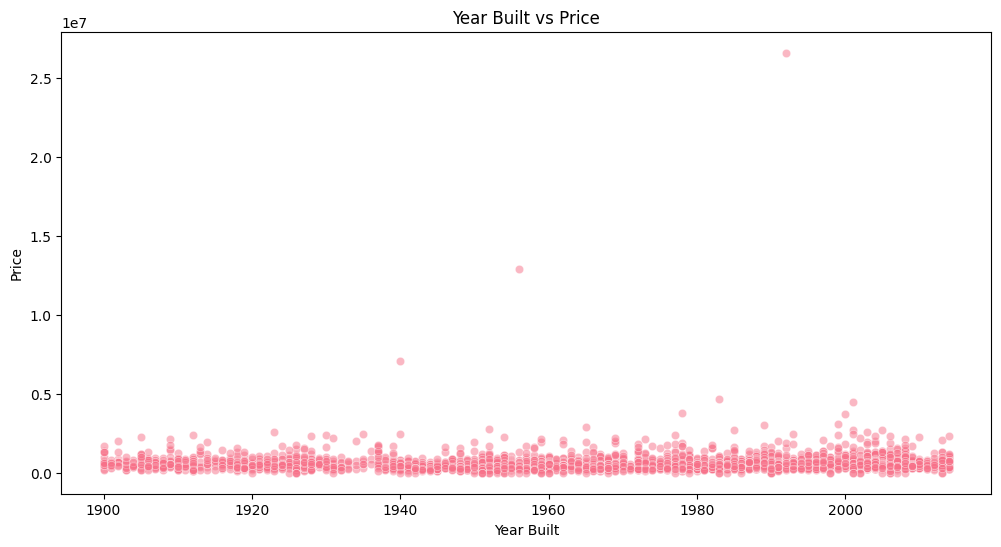

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='yr_built', y='price', alpha=0.5)
plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

In [29]:
fig = px.scatter_3d(df, x='sqft_living', y='bathrooms', z='price',
                    color='bedrooms', size='sqft_living',
                    title='3D Relationship between Price, Square Footage, and Bathrooms')
fig.show()

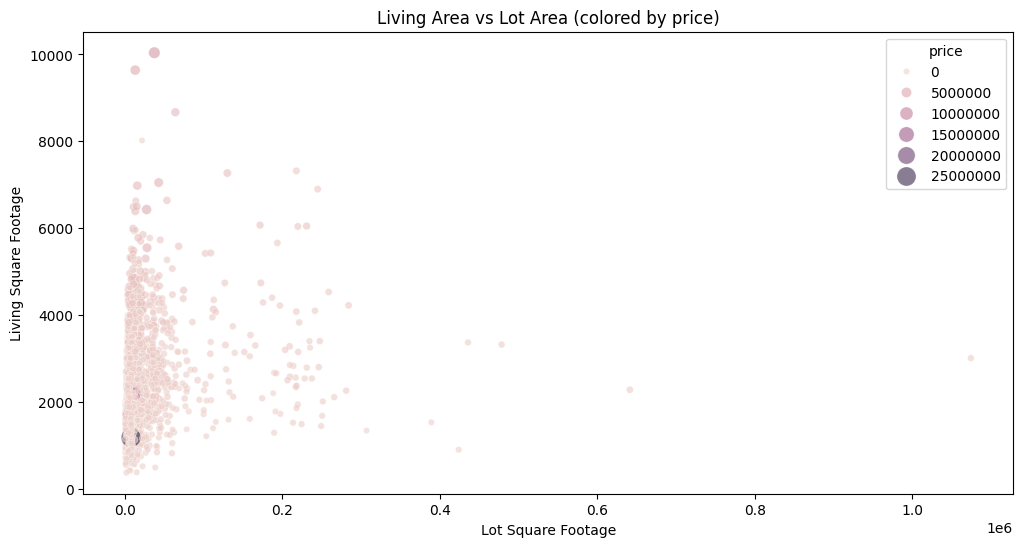

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sqft_lot', y='sqft_living', hue='price', 
                size='price', sizes=(20, 200), alpha=0.6)
plt.title('Living Area vs Lot Area (colored by price)')
plt.xlabel('Lot Square Footage')
plt.ylabel('Living Square Footage')
plt.show()

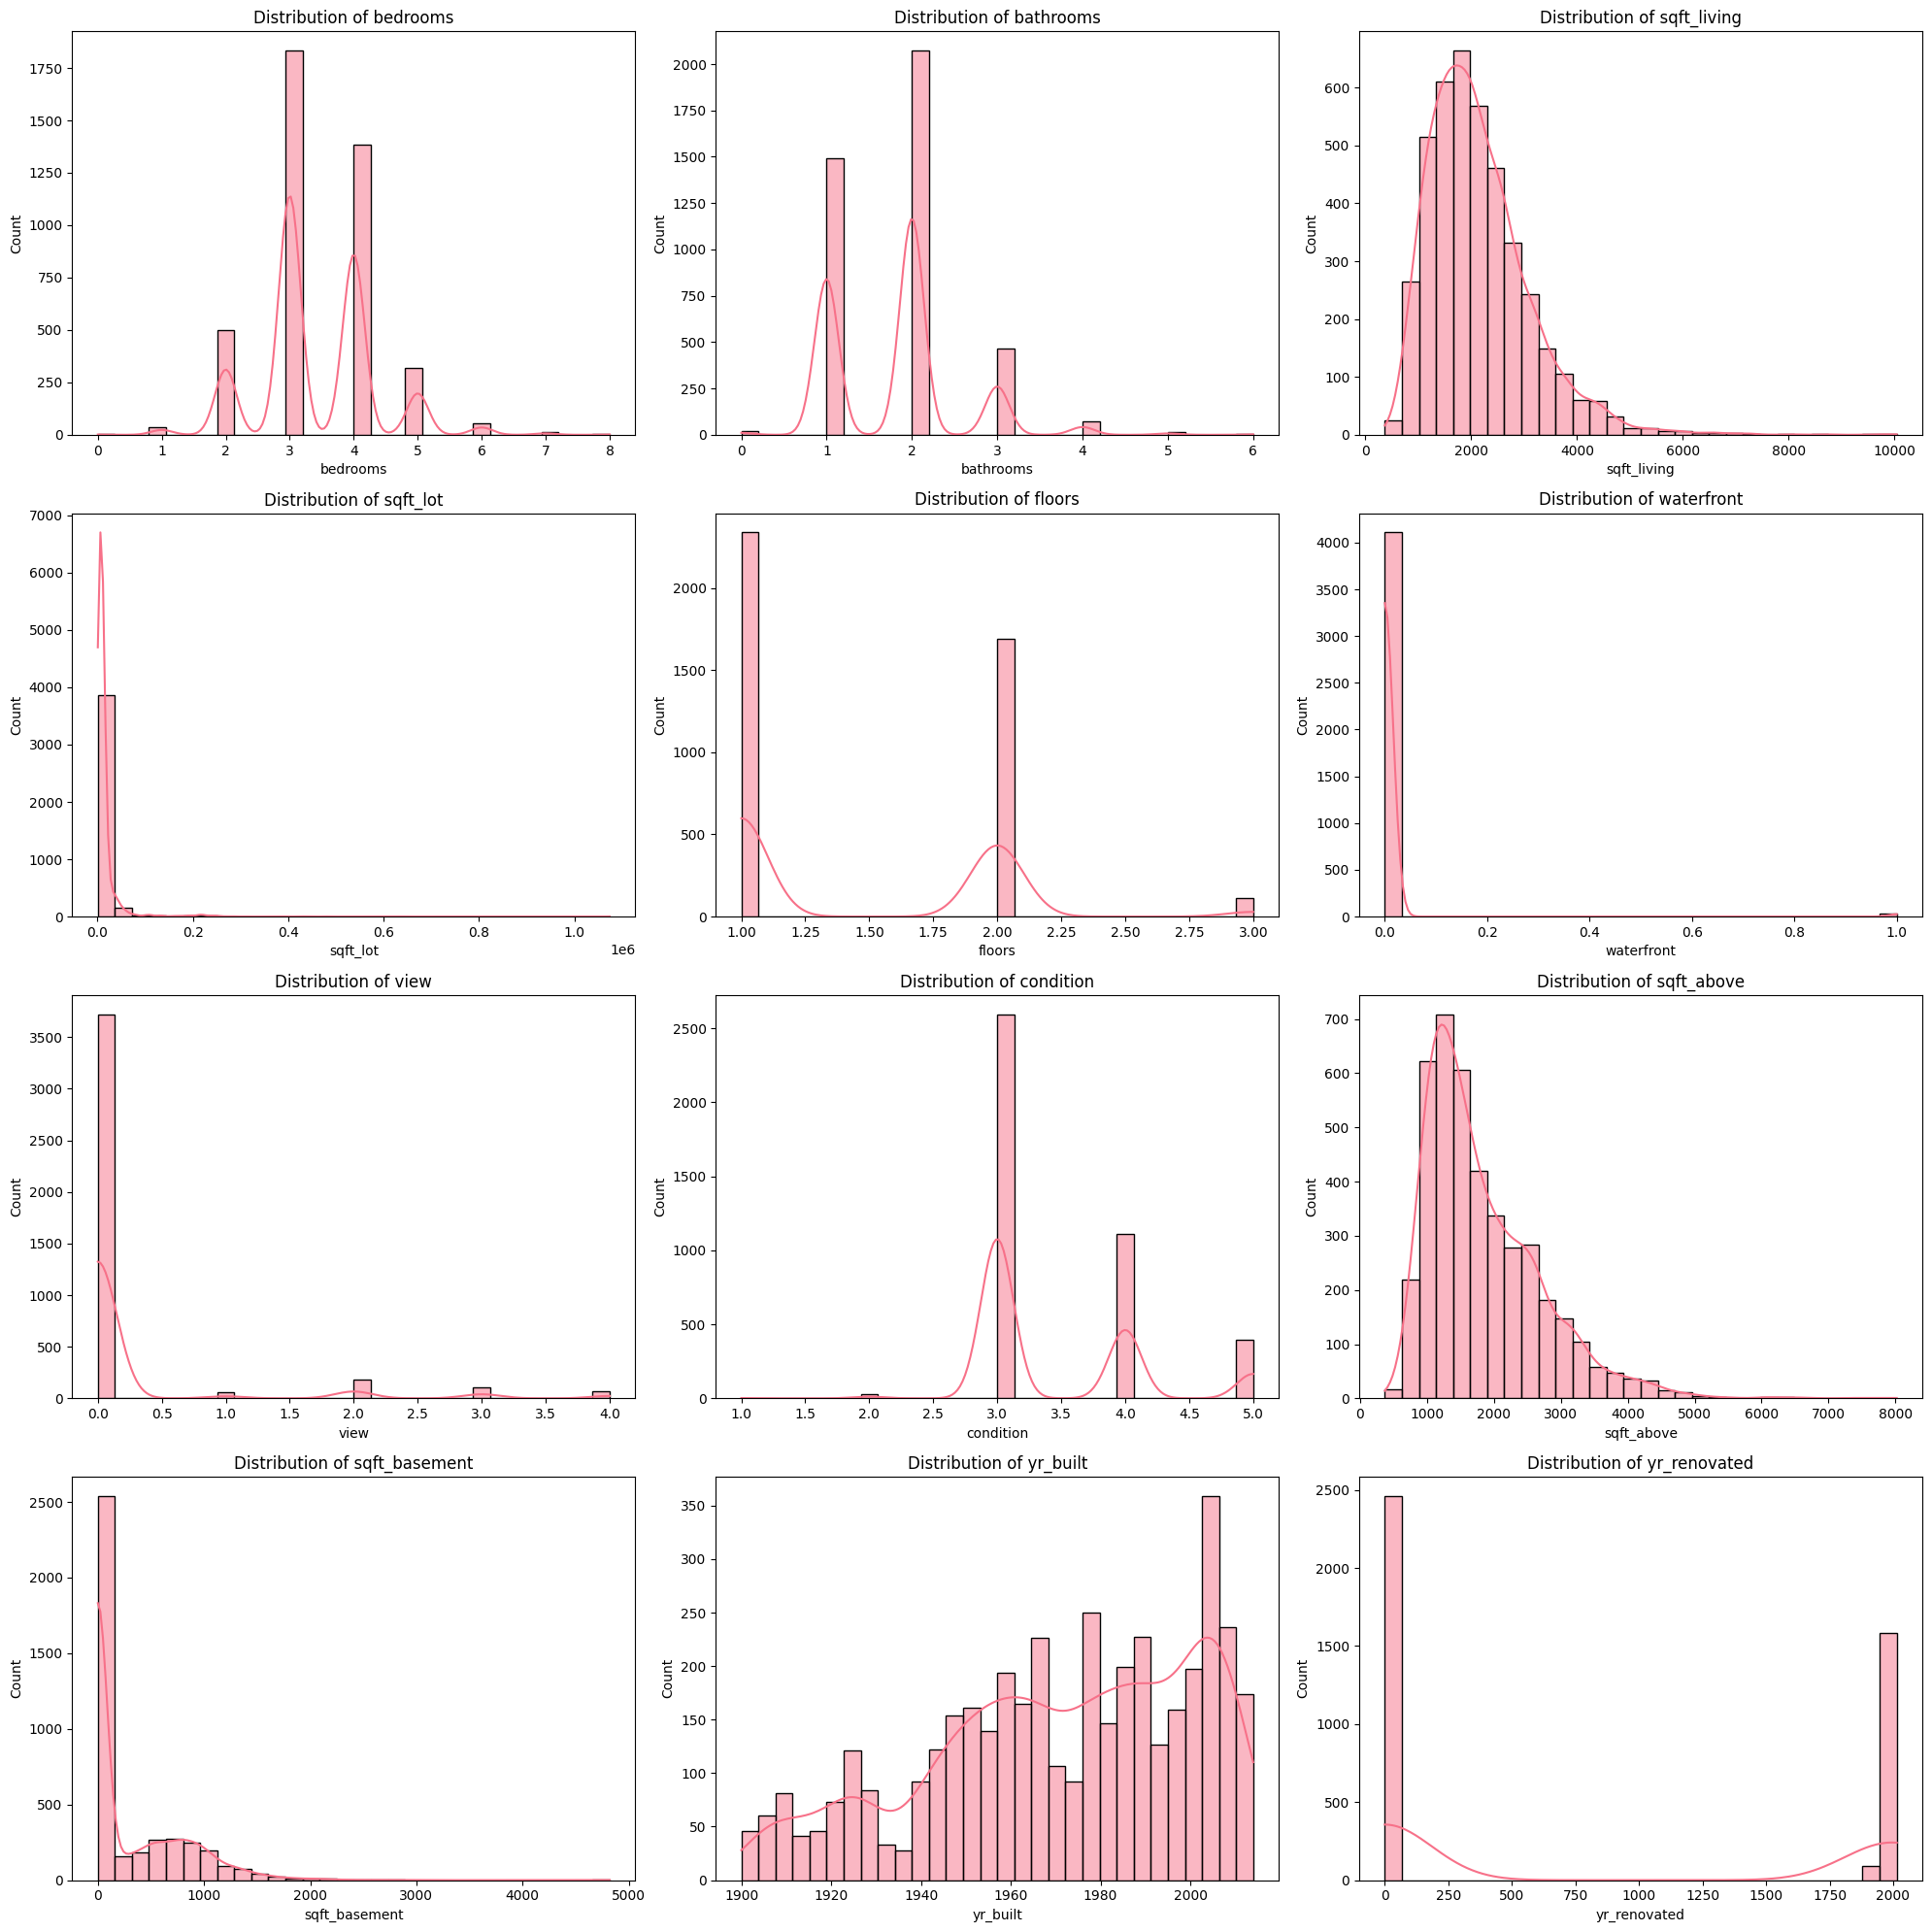

In [32]:
# Get numerical columns excluding price
numerical_cols = [col for col in df.select_dtypes(include=['int64']).columns if col != 'price']
n_features = len(numerical_cols)

# Calculate number of rows and columns needed for subplots
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # This ensures we have enough rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.ravel()

# Create distribution plots
for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], bins=30, kde=True)
    axes[idx].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None
    
    def fit(self, X, y):
        """
        Fit the linear regression model using Normal Equation
        """
        try:
            # Add column of ones for intercept
            X_b = np.c_[np.ones((X.shape[0], 1)), X]
            
            # Calculate theta using normal equation with regularization
            theta = np.linalg.inv(X_b.T.dot(X_b) + 1e-8 * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)
            
            self.intercept = float(theta[0])
            self.coefficients = theta[1:].astype(float)
            
            print("Model fitted successfully!")
            print(f"Intercept: {self.intercept}")
            print(f"Number of coefficients: {len(self.coefficients)}")
            
            return self
            
        except Exception as e:
            print(f"Error in fitting model: {str(e)}")
            raise
    
    def predict(self, X):
        """Make predictions on new data"""
        if self.coefficients is None or self.intercept is None:
            raise ValueError("Model has not been fitted yet!")
        return np.dot(X, self.coefficients) + self.intercept

In [46]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate Mean Squared Error
    MSE = (1/n) * Σ(y_true - y_pred)²
    """
    return np.mean((y_true - y_pred) ** 2)

In [47]:
def root_mean_squared_error(y_true, y_pred):
    """
    Calculate Root Mean Squared Error
    RMSE = √MSE
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [48]:
def mean_absolute_error(y_true,y_pred):
    """
    Calculate Mean Absolute Error
    MAE = (1/n) * sum|y_true - y_pred|
    """
    return np.mean(np.abs(y_true - y_pred))

In [49]:
def r2_score(y_true, y_pred):
    """
    calculates R^2 Score
    R^2 = 1 - (sum(y_true - y_pred)^2 / sum(y_true - y_mean)^2)
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [62]:
def cross_validation(X,y,k_folds=5):
    """
    Perform k-fold cross-validation
    returns R^2 scores for each fold
    """
    
    #Create array to store scores
    scores = np.zeros(k_folds)
    
    #Calculate fold size
    fold_size = len(X) // k_folds
    
    #shuffle indices
    indices = np.random.permutation(len(X))
    
    for i in range(k_folds):
        #Calculate start and end indices for test fold
        start_idx = i * fold_size
        end_idx = start_idx + fold_size if i < k_folds - 1 else len(X)
        
        #Get test indices for this fold
        test_idx = indices[start_idx:end_idx]
        
        #Get train indices
        train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
        #split data into training and test data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        #Train model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        #make predictions
        y_pred = model.predict(X_test)
        
        #Calculate and store R^2 score
        scores[i] = r2_score(y_test, y_pred)
        
    return scores

In [51]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [71]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (4140, 12)
Shape of y:  (4140,)


In [52]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

Model fitted successfully!
Intercept: 556737.9187785122
Number of coefficients: 12


In [81]:
if model.coefficients is None:
    raise ValueError("Model coefficients are None after fitting!")

In [55]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [56]:
def evaluate_model(y_true, y_pred,dataset_name=''):
    mse = mean_squared_error(y_true,y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nMetrics for {dataset_name}: ")
    print(f"Mean Squared Error: ${mse:,.2f}:")
    print(f"Root Mean Squared Error: ${rmse:,.2f}")
    print(f"Mean Absolute Error: ${mae:,.2f}")
    print(f"r2 Score: {r2:.4f}")

In [57]:
evaluate_model(y_train, y_pred_train, "Training Data")


Metrics for Training Data: 
Mean Squared Error: $341,641,985,331.06:
Root Mean Squared Error: $584,501.48
Mean Absolute Error: $206,593.81
r2 Score: 0.1448


In [58]:
evaluate_model(y_test, y_pred_test, "Test Data")


Metrics for Test Data: 
Mean Squared Error: $79,428,091,783.11:
Root Mean Squared Error: $281,829.90
Mean Absolute Error: $199,156.50
r2 Score: 0.2424


In [63]:
cv_scores = cross_validation(X_train_scaled, y_train)
print("\nCross-Validation r2 Scores:", cv_scores)
print("Average CV r2 score:", cv_scores.mean())
print("CV r2 Standard deviation:", cv_scores.std())


Cross-Validation r2 Scores: [ 0.40298651 -1.19843283  0.0639753   0.49372918  0.5477736 ]
Average CV r2 score: 0.06200635409203488
CV r2 Standard deviation: 0.6522779623013664


In [85]:
feature_names = df.drop('price', axis=1).columns
coefficients_array = model.coefficients

print("\nFeature Importance Calculation:")
print(f"Number of Features: {len(feature_names)}")
print(f"number of Coefficients: {len(coefficients_array)}")


Feature Importance Calculation:
Number of Features: 12
number of Coefficients: 12


In [86]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_array
})

In [87]:
print(feature_importance)

          Feature    Coefficient
0        bedrooms  -58898.410550
1       bathrooms   45366.327860
2     sqft_living  136599.406304
3        sqft_lot  -26703.815121
4          floors   13539.507311
5      waterfront   36958.406939
6            view   27752.031966
7       condition   20912.401594
8      sqft_above  121592.254845
9   sqft_basement   56781.492797
10       yr_built  -61614.035618
11   yr_renovated    4601.453164


In [88]:
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

In [89]:
print('\nfeature Importance: ')
print(feature_importance)


feature Importance: 
          Feature    Coefficient  Abs_Coefficient
2     sqft_living  136599.406304    136599.406304
8      sqft_above  121592.254845    121592.254845
10       yr_built  -61614.035618     61614.035618
0        bedrooms  -58898.410550     58898.410550
9   sqft_basement   56781.492797     56781.492797
1       bathrooms   45366.327860     45366.327860
5      waterfront   36958.406939     36958.406939
6            view   27752.031966     27752.031966
3        sqft_lot  -26703.815121     26703.815121
7       condition   20912.401594     20912.401594
4          floors   13539.507311     13539.507311
11   yr_renovated    4601.453164      4601.453164


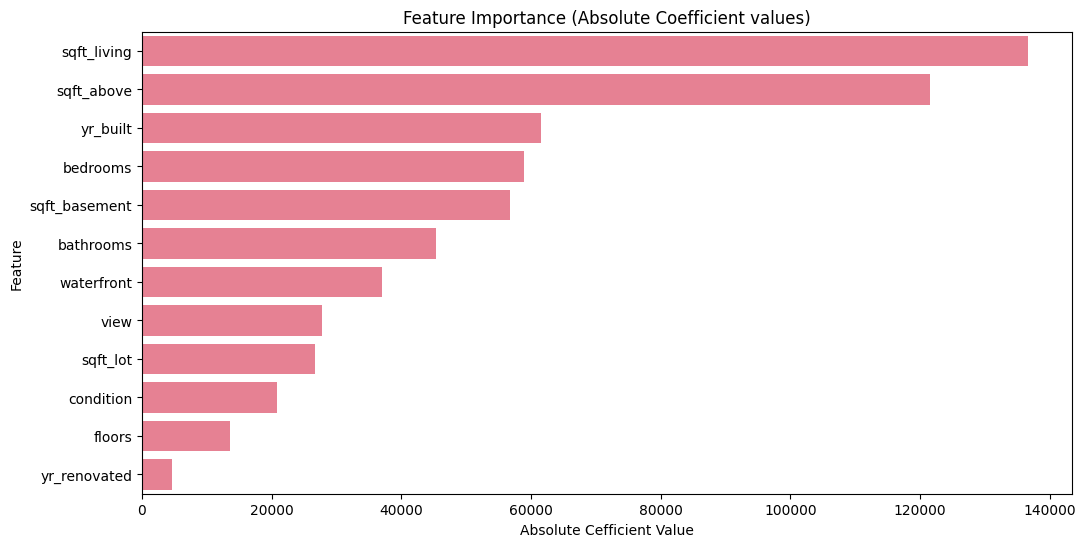

In [97]:
plt.figure(figsize=(12,6))
sns.barplot(data=feature_importance, x="Abs_Coefficient", y="Feature")
plt.title("Feature Importance (Absolute Coefficient values)")
plt.xlabel("Absolute Cefficient Value")
plt.show()

In [98]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

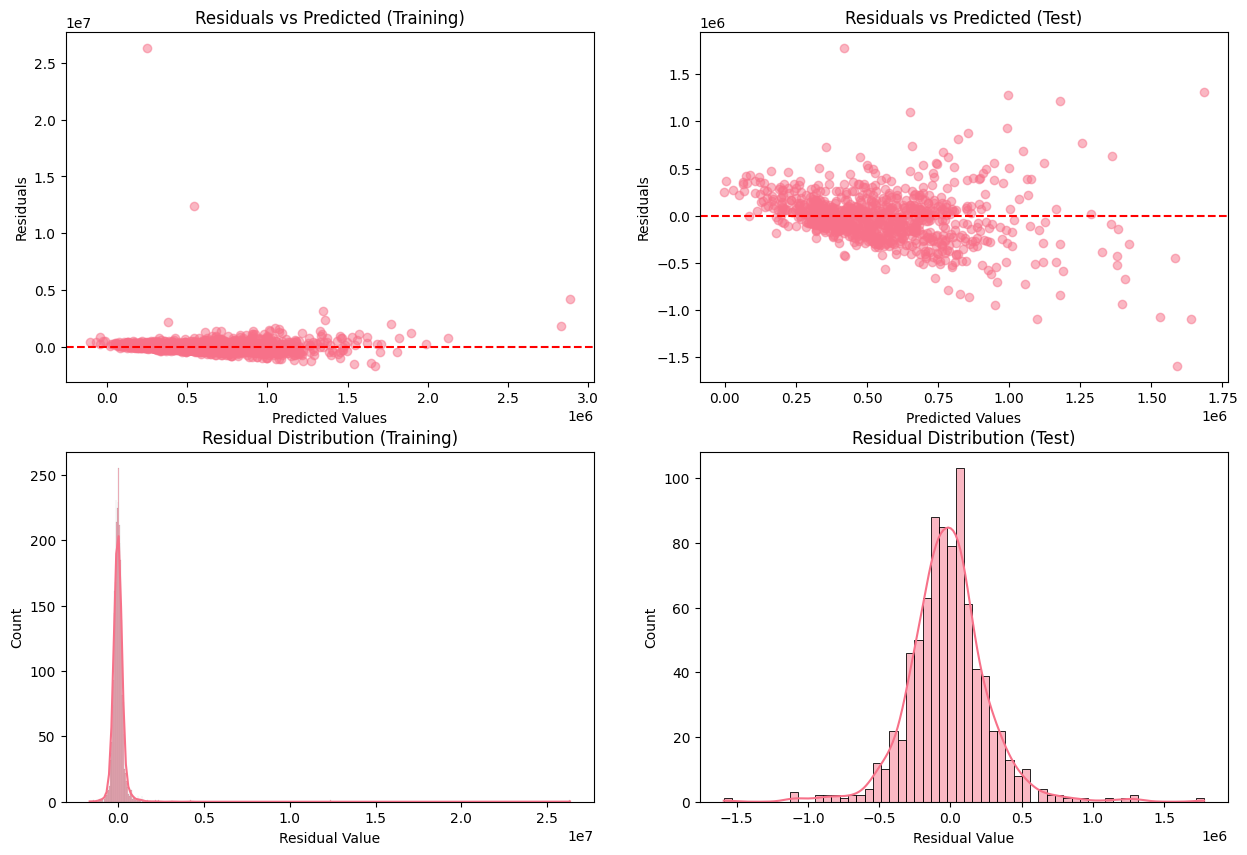

In [104]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

axes[0,0].scatter(y_pred_train, residuals_train, alpha=0.5)
axes[0,0].axhline(y=0,color='r',linestyle='--')
axes[0,0].set_title('Residuals vs Predicted (Training)')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

axes[0, 1].scatter(y_pred_test, residuals_test, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs Predicted (Test)')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')

sns.histplot(residuals_train, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Residual Distribution (Training)')
axes[1, 0].set_xlabel('Residual Value')

sns.histplot(residuals_test, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Residual Distribution (Test)')
axes[1, 1].set_xlabel('Residual Value')

plt.show()

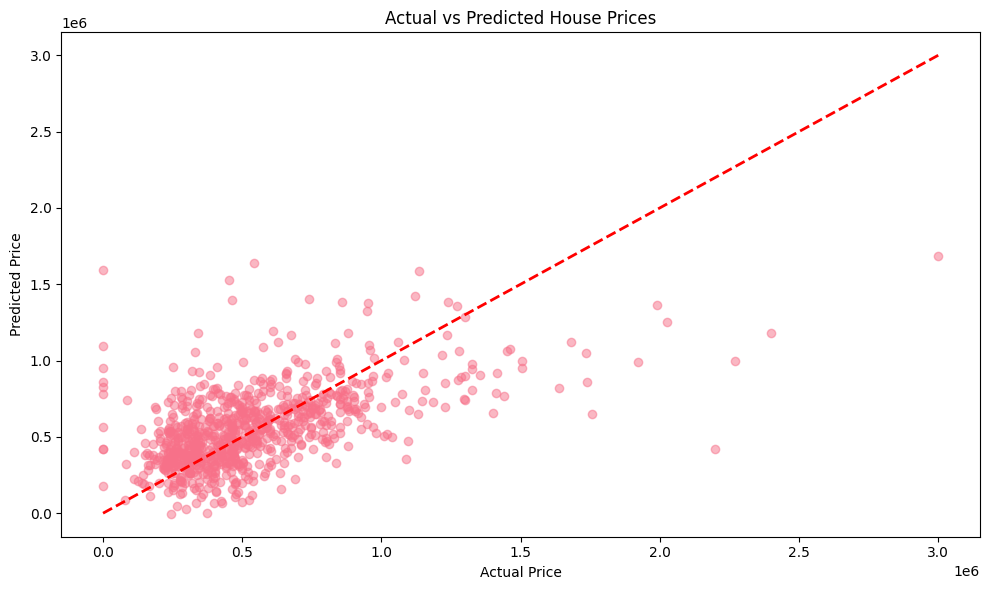

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [106]:
def predict_price(features_dict):
    input_array = np.array([[features_dict[col]for col in feature_names]])
    input_scaled = scaler.transform(input_array)
    return model.predict(input_scaled)[0]


In [107]:
example_house = {'bedrooms':3,
                 'bathrooms':2,
                 'sqft_living':2000,
                 'sqft_lot':5000,
                 'floors':2,
                 'waterfront':0,
                 'view':0,
                 'condition':3,
                 'sqft_above':1500,
                 'sqft_basement':500,
                 'yr_built':1990,
                 'yr_renovated':0}

In [108]:
predicted_price = predict_price(example_house)
print(f"\nPredicted price for example house: ${predicted_price:,.2f}")


Predicted price for example house: $501,424.99
